In [22]:
from utils import * 
import numpy as np 
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
X, y = load_data()

In [24]:
print(f"{X.shape}, {y.shape}")

(1000, 400), (1000, 1)


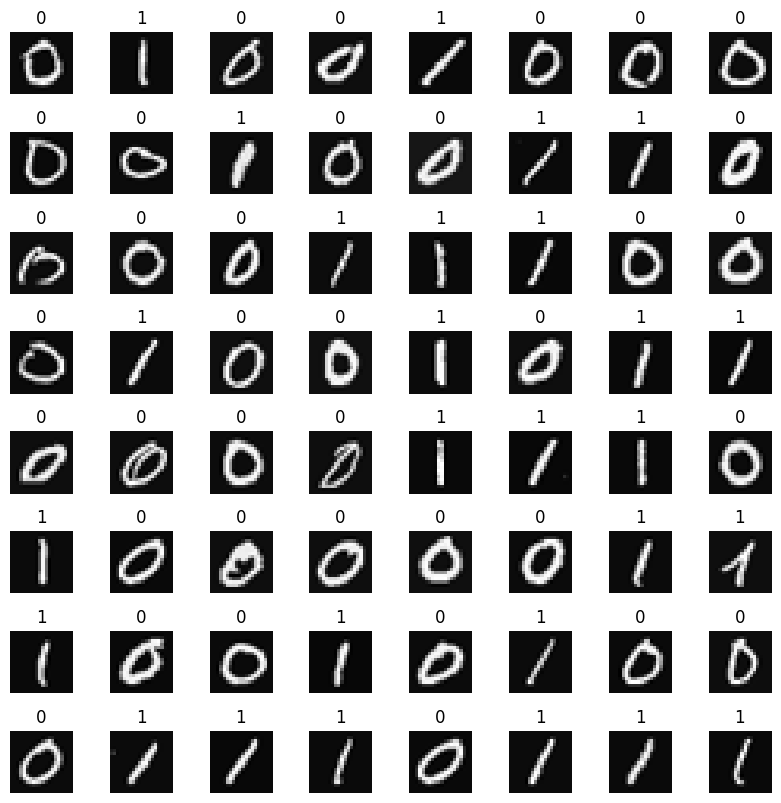

In [25]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [26]:
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(25, activation='sigmoid'),
    Dense(15, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 dense_6 (Dense)             (None, 25)                10025     
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
L1_num_params = 400 * 25 + 25  # W1 parameters  + b1 parameters
L2_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L3_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params, " Total = ", L1_num_params+L2_num_params+L3_num_params)

L1 params =  10025 , L2 params =  390 ,  L3 params =  16  Total =  10431


In [28]:
#### Examine Weights shapes
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [29]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model.fit(
    X,y,
    epochs=30
)

Epoch 1/30
32/32 [==============================] - 0s 672us/step - loss: 0.7545 - accuracy: 0.5000
Epoch 2/30
32/32 [==============================] - 0s 607us/step - loss: 0.5320 - accuracy: 0.7630
Epoch 3/30
32/32 [==============================] - 0s 571us/step - loss: 0.3873 - accuracy: 0.9930
Epoch 4/30
32/32 [==============================] - 0s 421us/step - loss: 0.2755 - accuracy: 0.9960
Epoch 5/30
32/32 [==============================] - 0s 431us/step - loss: 0.2032 - accuracy: 0.9970
Epoch 6/30
32/32 [==============================] - 0s 442us/step - loss: 0.1584 - accuracy: 0.9960
Epoch 7/30
32/32 [==============================] - 0s 449us/step - loss: 0.1289 - accuracy: 0.9970
Epoch 8/30
32/32 [==============================] - 0s 432us/step - loss: 0.1083 - accuracy: 0.9970
Epoch 9/30
32/32 [==============================] - 0s 438us/step - loss: 0.0931 - accuracy: 0.9980
Epoch 10/30
32/32 [==============================] - 0s 420us/step - loss: 0.0812 - accuracy: 0.9980

In [30]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 37ms/step
 predicting a zero: [[0.02233985]]
1/1 [==============================] - 0s 8ms/step
 predicting a one:  [[0.99167275]]


In [47]:
W1, B1 = model.layers[0].weights
W2, B2 = model.layers[1].weights 
W3, B3 = model.layers[2].weights

#### NumPy implementation

In [63]:
def dense(a_in, W, b):
    z = np.matmul(a_in, W) + b 
    return 1 / ( 1 + np.exp(-z) )

In [65]:
def sequential(x, W1, B1, W2, B2, W3, B3):
    a0 = x 
    a1 = dense(a0, W1, B1)
    a2 = dense(a1, W2, B2)
    a3 = dense(a2, W3, B3)
    return a3

In [69]:
prediction = 1 if sequential(X[-1], W1, B1, W2, B2, W3, B3) >= 0.5 else 0
prediction

1